# IHLT - Lab 7 
1. Read all pairs of sentences of the trial set within the evaluation framework of the project.
2. Compute their similarities by considering the following approach:
    - words plus NEs and Jaccard coefficient (`word_and_NEs=['John Smith', 'is', 'working']`)
3. Show the results.
4. Do you think it could be relevant to use NEs to compute the similarity between two sentences? Justify the answer.

## Imports

In [1]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.metrics import jaccard_distance
from scipy.stats import pearsonr
import nltk

## 1. Data Preparation

As it has been done in other lab sessions, all pairs of sentences of the trial set are read and stored in a variable.

In [2]:
pairs = list()
with open('trial/STS.input.txt','r') as f:
    lines = f.readlines()
    for line in lines:
        line = nltk.TabTokenizer().tokenize(line.strip())
        pairs.append((line[1], line[2]))
        
for index, pair in enumerate(pairs):
    print(str(index + 1) + ".", pair)

1. ('The bird is bathing in the sink.', 'Birdie is washing itself in the water basin.')
2. ('In May 2010, the troops attempted to invade Kabul.', 'The US army invaded Kabul on May 7th last year, 2010.')
3. ('John said he is considered a witness but not a suspect.', '"He is not a suspect anymore." John said.')
4. ('They flew out of the nest in groups.', 'They flew into the nest together.')
5. ('The woman is playing the violin.', 'The young lady enjoys listening to the guitar.')
6. ('John went horse back riding at dawn with a whole group of friends.', 'Sunrise at dawn is a magnificent view to take in if you wake up early enough for it.')


## 2. Word + NEs approach
In order to get the *Jaccard Coefficient* between each pair of sentences, words + NEs will be obtained for each sample this time. The NERC will be evaluated using NLTK.

In [3]:
pairs = [(pos_tag(word_tokenize(p[0])), pos_tag(word_tokenize(p[1]))) for p in pairs]

for index, pair in enumerate(pairs):
    print(str(index + 1) + ".", pair, '\n')

1. ([('The', 'DT'), ('bird', 'NN'), ('is', 'VBZ'), ('bathing', 'VBG'), ('in', 'IN'), ('the', 'DT'), ('sink', 'NN'), ('.', '.')], [('Birdie', 'NNP'), ('is', 'VBZ'), ('washing', 'VBG'), ('itself', 'PRP'), ('in', 'IN'), ('the', 'DT'), ('water', 'NN'), ('basin', 'NN'), ('.', '.')]) 

2. ([('In', 'IN'), ('May', 'NNP'), ('2010', 'CD'), (',', ','), ('the', 'DT'), ('troops', 'NNS'), ('attempted', 'VBD'), ('to', 'TO'), ('invade', 'VB'), ('Kabul', 'NNP'), ('.', '.')], [('The', 'DT'), ('US', 'NNP'), ('army', 'NN'), ('invaded', 'VBD'), ('Kabul', 'NNP'), ('on', 'IN'), ('May', 'NNP'), ('7th', 'CD'), ('last', 'JJ'), ('year', 'NN'), (',', ','), ('2010', 'CD'), ('.', '.')]) 

3. ([('John', 'NNP'), ('said', 'VBD'), ('he', 'PRP'), ('is', 'VBZ'), ('considered', 'VBN'), ('a', 'DT'), ('witness', 'NN'), ('but', 'CC'), ('not', 'RB'), ('a', 'DT'), ('suspect', 'NN'), ('.', '.')], [('``', '``'), ('He', 'PRP'), ('is', 'VBZ'), ('not', 'RB'), ('a', 'DT'), ('suspect', 'NN'), ('anymore', 'RB'), ('.', '.'), ("''", "''

In the NLTK's NERC, the option `binary=True` will be used in order to just recognize named entities, without taking into consideration the classification of three NEs classes (PERSON, LOCATION, ORGANIZATION). Moreover, the function `tree2conlltags(ne_chunk_res)` will be utilized in order to iterate and get the NEs.

The function `transform_sentence(ne_chunk_res)` will iterate over the tree using `tree2conlltags(ne_chunk_res)` and will return the proposed approach (Words + NEs)

In [4]:
def transform_sentence(ne_chunk_res):
    conlltags = nltk.chunk.tree2conlltags(ne_chunk_res)
    transformed_sentence = []
    index = 0
    while index < len(conlltags):
        if conlltags[index][2] == 'B-NE':
            ne = conlltags[index][0]
            for consecutive_index in range(index+1, len(conlltags)):
                if conlltags[consecutive_index][2] == 'I-NE':
                    ne += " " + conlltags[consecutive_index][0]
                else:
                    break
            transformed_sentence.append(ne)
            index = consecutive_index
        else:
            transformed_sentence.append(conlltags[index][0])
            index += 1
    return transformed_sentence

In [5]:
word_and_NEs = [(transform_sentence(ne_chunk(pair[0], binary=True)), 
                 transform_sentence(ne_chunk(pair[1], binary=True))) 
                for pair in pairs]

for index, pair in enumerate(word_and_NEs):
    print(str(index + 1) + ".", pair, '\n')

1. (['The', 'bird', 'is', 'bathing', 'in', 'the', 'sink', '.'], ['Birdie', 'is', 'washing', 'itself', 'in', 'the', 'water', 'basin', '.']) 

2. (['In', 'May', '2010', ',', 'the', 'troops', 'attempted', 'to', 'invade', 'Kabul', '.'], ['The', 'US', 'army', 'invaded', 'Kabul', 'on', 'May', '7th', 'last', 'year', ',', '2010', '.']) 

3. (['John', 'said', 'he', 'is', 'considered', 'a', 'witness', 'but', 'not', 'a', 'suspect', '.'], ['``', 'He', 'is', 'not', 'a', 'suspect', 'anymore', '.', "''", 'John', 'said', '.']) 

4. (['They', 'flew', 'out', 'of', 'the', 'nest', 'in', 'groups', '.'], ['They', 'flew', 'into', 'the', 'nest', 'together', '.']) 

5. (['The', 'woman', 'is', 'playing', 'the', 'violin', '.'], ['The', 'young', 'lady', 'enjoys', 'listening', 'to', 'the', 'guitar', '.']) 

6. (['John', 'went', 'horse', 'back', 'riding', 'at', 'dawn', 'with', 'a', 'whole', 'group', 'of', 'friends', '.'], ['Sunrise', 'at', 'dawn', 'is', 'a', 'magnificent', 'view', 'to', 'take', 'in', 'if', 'you', '

**Notice from the output that this approach with the *trial set* would be the same that the approach using only words. The reason behind this is that the NEs have a maximum length of 1 in these pairs (*e.g.* 'Kabul', 'Birdie'...).**

Therefore, as the sets are composed of the same elements used in other sessions, the similarity and the *Pearson Correlation Coefficient* will be the same.

## 3. Similarities and *Jaccard Coefficient*

As we have done in other lab sessions, the *Jaccard Coefficient* is used in order to compute the similarity between pairs of sentences. In this case, it is used the combination of their words and NEs (with all NEs with a maximum length of 1).

In [6]:
similarities = [1 - jaccard_distance(set(p[0]), set(p[1])) for p in word_and_NEs]

print("Similarities (considering Words + NEs):\n")
for index, similarity in enumerate(similarities, 1):
    print(str(index) + ".", similarity)

Similarities (considering Words + NEs):

1. 0.3076923076923077
2. 0.26315789473684215
3. 0.4666666666666667
4. 0.4545454545454546
5. 0.23076923076923073
6. 0.13793103448275867


As it has been done in the other lab sessions, the similarities will be compared to the Gold Standard using the *Pearson Correlation Coefficient* too.

According to `00-readme.txt`, the similarity between two sentences that are completely equivalent should be 1/1 (or 5/5) and the similarity between two sentences that are on different topics should be 0/1 (or 0/5). For that reason, the reference similarities should be `[1.0, 0.8, 0.6, 0.4, 0.2, 0]` or its proportional values `[5, 4, 3, 2, 1, 0]`.

The values in the gold standard file STS.gs.txt are reversed, so they will be read and then inverted in order to get them correctly:

In [7]:
gs = list()
with open('trial/STS.gs.txt','r') as f:
    lines = f.readlines()
    for line in lines:
        line = nltk.TabTokenizer().tokenize(line.strip())
        gs.append(int(line[1]))

gs.reverse()
print("Gold standard:", gs)
print("Pearson correlation (words + NEs):", pearsonr(gs, similarities)[0])

Gold standard: [5, 4, 3, 2, 1, 0]
Pearson correlation (words + NEs): 0.3962389776119232


**Do you think it could be relevant to use NEs to compute the similarity between two sentences? Justify the answer.**

As it has been explained, the NEs in the *trial set* have a maximum length of one word. Consequently, the same similarities and *Pearson Correlation Coefficient* are obtained.

To answer this question, 5 pairs of sentences from the *test set* of the project (`STS.input.MSRpar.txt`) will be selected in order to use this approach (words + NEs) and compare correctly its performance:

In [8]:
pairs = list()
with open('test-gold/STS.input.MSRpar.txt','r') as f:
    lines = f.readlines()[:5]
    for line in lines:
        line = nltk.TabTokenizer().tokenize(line.strip())
        pairs.append((line[0], line[1]))

word = [(word_tokenize(p[0]), word_tokenize(p[1])) for p in pairs]

pairs = [(pos_tag(p[0]), pos_tag(p[1])) for p in word]
word_and_NEs = [(transform_sentence(ne_chunk(pair[0], binary=True)), 
                 transform_sentence(ne_chunk(pair[1], binary=True))) 
                for pair in pairs]

In [9]:
print("Words")
for index, pair in enumerate(word):
    print(str(index + 1) + ".", pair, '\n')

Words
1. (['The', 'problem', 'likely', 'will', 'mean', 'corrective', 'changes', 'before', 'the', 'shuttle', 'fleet', 'starts', 'flying', 'again', '.'], ['He', 'said', 'the', 'problem', 'needs', 'to', 'be', 'corrected', 'before', 'the', 'space', 'shuttle', 'fleet', 'is', 'cleared', 'to', 'fly', 'again', '.']) 

2. (['The', 'technology-laced', 'Nasdaq', 'Composite', 'Index', '.IXIC', 'inched', 'down', '1', 'point', ',', 'or', '0.11', 'percent', ',', 'to', '1,650', '.'], ['The', 'broad', 'Standard', '&', 'Poor', "'s", '500', 'Index', '.SPX', 'inched', 'up', '3', 'points', ',', 'or', '0.32', 'percent', ',', 'to', '970', '.']) 

3. (['``', 'It', "'s", 'a', 'huge', 'black', 'eye', ',', "''", 'said', 'publisher', 'Arthur', 'Ochs', 'Sulzberger', 'Jr.', ',', 'whose', 'family', 'has', 'controlled', 'the', 'paper', 'since', '1896', '.'], ['``', 'It', "'s", 'a', 'huge', 'black', 'eye', ',', "''", 'Arthur', 'Sulzberger', ',', 'the', 'newspaper', "'s", 'publisher', ',', 'said', 'of', 'the', 'scandal

In [10]:
print("Words + NEs")
for index, pair in enumerate(word_and_NEs):
    print(str(index + 1) + ".", pair, '\n')

Words + NEs
1. (['The', 'problem', 'likely', 'will', 'mean', 'corrective', 'changes', 'before', 'the', 'shuttle', 'fleet', 'starts', 'flying', 'again', '.'], ['He', 'said', 'the', 'problem', 'needs', 'to', 'be', 'corrected', 'before', 'the', 'space', 'shuttle', 'fleet', 'is', 'cleared', 'to', 'fly', 'again', '.']) 

2. (['The', 'technology-laced', 'Nasdaq Composite Index', '.IXIC', 'inched', 'down', '1', 'point', ',', 'or', '0.11', 'percent', ',', 'to', '1,650', '.'], ['The', 'broad', 'Standard', '&', 'Poor', "'s", '500', 'Index', '.SPX', 'inched', 'up', '3', 'points', ',', 'or', '0.32', 'percent', ',', 'to', '970', '.']) 

3. (['``', 'It', "'s", 'a', 'huge', 'black', 'eye', ',', "''", 'said', 'publisher', 'Arthur Ochs Sulzberger', 'Jr.', ',', 'whose', 'family', 'has', 'controlled', 'the', 'paper', 'since', '1896', '.'], ['``', 'It', "'s", 'a', 'huge', 'black', 'eye', ',', "''", 'Arthur Sulzberger', ',', 'the', 'newspaper', "'s", 'publisher', ',', 'said', 'of', 'the', 'scandal', '.']) 

Similarities and *Jaccard Correlation Coefficient* with this *test set*:

In [11]:
similarities = [1 - jaccard_distance(set(p[0]), set(p[1])) for p in word]

print("Similarities (considering Words) [test set]:\n")
for index, similarity in enumerate(similarities, 1):
    print(str(index) + ".", similarity)
    
similarities_NEs = [1 - jaccard_distance(set(p[0]), set(p[1])) for p in word_and_NEs]

print("\nSimilarities (considering Words + NEs) [test set]:\n")
for index, similarity in enumerate(similarities_NEs, 1):
    print(str(index) + ".", similarity)

Similarities (considering Words) [test set]:

1. 0.28
2. 0.27586206896551724
3. 0.5555555555555556
4. 0.5909090909090908
5. 0.19999999999999996

Similarities (considering Words + NEs) [test set]:

1. 0.28
2. 0.25
3. 0.5
4. 0.6190476190476191
5. 0.20833333333333337


In [12]:
gs = list()
with open('test-gold/STS.gs.MSRpar.txt','r') as f:
    lines = f.readlines()[:5]
    for line in lines:
        line = nltk.TabTokenizer().tokenize(line.strip())
        gs.append(float(line[0]))

print("Gold standard:", gs)
print("Pearson correlation (words):", pearsonr(gs, similarities)[0])
print("Pearson correlation (words + NEs):", pearsonr(gs, similarities_NEs)[0])

Gold standard: [4.4, 0.8, 3.6, 3.4, 1.4]
Pearson correlation (words): 0.5138216407797424
Pearson correlation (words + NEs): 0.5239147649937855


As it can be analyzed, the utilization of NEs can improve the *Pearson Correlation Coefficient*. Some pairs of sentences will be studied in order to infer the reason of this improvement (NEs in bold):

- Second pair:
    - The technology-laced **Nasdaq Composite Index** .IXIC inched down 1 point, or 0.11 percent, to 1,650.	
    - The broad Standard & Poor's 500 *Index* .SPX inched up 3 points, or 0.32 percent, to 970.
    
As **Nasdaq Composite Index** is a NEs, when the *Jaccard distance* is computed, it does not take into consideration the word *Index* as an equivalence between the pair of sentence. Therefore, the similarity gets a lower value and results in a value nearer to the GS.

- Fourth pair:
    - SEC Chairman **William Donaldson** said there is a "building confidence out there that the cop is on the beat."
    - "I think there's a building confidence that the cop is on the beat."
    
As **William Donaldson** is considered as a singular element, there are less different elements between the pair of sentences. Consequently, the similarity gets a higher value and results in a value nearer to the GS.

- Fifth pair:
    - Vivendi shares closed 1.9 percent at 15.80 euros in Paris after falling 3.6 percent on Monday.
    - In **New York**, Vivendi shares were 1.4 percent down at $18.29.

In this pair, the same situation that happened with the fourth pair occurs.

Nevertheless, sometimes, the use of NEs can produce worse results sometimes:

- Third pair:
    - "It's a huge black eye," said publisher **Arthur Ochs Sulzberger** Jr., whose family has controlled the paper since 1896.
    - "It's a huge black eye," **Arthur Sulzberger**, the newspaper's publisher, said of the scandal.
    
In this case, since the entire name **Arthur Ochs Sulzberger** is not equal to the name of the second sentence **Arthur Sulzberger**, the similarity gets a lower value and more distance to the GS.

In conclusion, after analyzing these examples, the use of NEs can be relevant when computing the similarity between a pair of sentences. Even taking into account samples where the results get worse (fifth pair), there are some cases where the results improve (second, fourth & fifth pair). The underlying reason behind this is the fact that some combination of words should be taken as a single word (*e.g.* New York) instead of comparing them separately. In other words, only if the entire NEs is in the other sentence, it should be taken as a similar word. 

On the other hand, as the number of elements inside each set of the *Jaccard Distance* is reduced (due to the transformation of sequence of words to a single NE), the variation of similarity (*i.e.* the weight of each element in the computation) is greater. Therefore, if the inclusion of NEs is taken with caution, it can be relevant.

## 4. Optional Exercise
Enlarge the provided grammar to parse the next sentence as the image of the definition of the exercise:

```python
[("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),("dog", "NN"),\
 ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN"), \
 ("in", "IN"), ("New", "NNP"), ("York", "NNP")]
```

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  (PP at/IN (NP the/DT cat/NN))
  (PP in/IN (NP New/NNP York/NNP)))


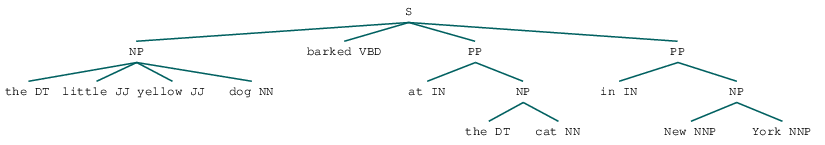

In [13]:
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),("dog", "NN"),\
            ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN"), \
            ("in", "IN"), ("New", "NNP"), ("York", "NNP")]

# grammar = "NP: {<DT>?<JJ>*<NN>}"

grammar = """
          NP: {<DT>?<JJ>*<NN>|<NNP>+}
          PP: {<IN><NP>}
          """ 

cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence)

print(result)
result

As it can be observed, the grammar has changed from this:

`NP: {<DT>?<JJ>*<NN>}`

To a grammar composed by:

`NP: {<DT>?<JJ>*<NN>|<NNP>+}`, where it is admitted that a NP can be composed by a sequence of proper singular noun (NNP) instead of by a single singular or mass noun (NN) (therefore, New York is considered a NP too).

`PP: {<IN><NP>}`, where it is defined that a PP is a combination of a preposition or subordinating conjunction (IN) and the NP declared before (*e.g.* (at, the cat) or (in, New York)). 

Notice that the order of this composition (NP & PP and not PP & NP) is important. It must be taken into consideration that this enlargement has been made trying to affect as little as possible sentences out of this example.  